# Data Sci: Homework 3

## Ilana Zimmerman

## 1/24/18

## Summary

On July 8th, 2014, the Brazil National Soccer team played the German National Soccer team in the 2014 World Cup. Imagine a scenario where our hero, let's call him 'Rick' watches the game.  Rick's roommate is doing chores and is moderately interested in soccer.  The roommate will come out five times and watch for approximately 5-10 minutes. E.g., he will come out a total of five times and watch for a random amount of time between 5 and 10 minutes.

For our purposes, a soccer match is 90 minutes long.  The end score was 1-7, with Germany winning.  Here are the exact minutes of when all eight goals happened:

 - Goals at 11, 23, 24, 26, 29, 69, 79, and 90.

If the only thing we remember is that Rick's roommate came out five times and watched between 5 and 10 minutes each time, what is the expected number of goals that Rick's roomate watched?  Also plot an empirical distribution of goals.

To answer this question we will simulate the above scenario many times and average the total number of goals to get the expected number.

In [14]:
# Import libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
%matplotlib inline

In [15]:
# Setup parameters

# Minutes when goals happened
goal_minutes = [11, 23, 24, 26, 29, 69, 79, 90]

# How many times roommate comes out
roommate_views = 5

# Possible lengths of roommate viewing times
roommate_view_len = [5, 6, 7, 8, 9, 10]

# Game end minute
game_end = 90

# Number of simulations to run
n_sim = 1000

Now that we have written down everything we know, let's create a function that will accept these arguments:

- Roommate start time (integer between 1 and 90)
- Roommate end time (integer in 'roommate_view_len'), remember not to count goals occuring exactly on this minute.
- Goal minutes (list of integers of when goals happened)

And returns the following:

- Number of goals seen (Integer between 0 and 8)

In [16]:
def count_goals(start_time, end_time, goal_min_list):
    end_time not in goal_minutes
    goals_seen=[]
    goals_seen_count=0
    i=0
    for i in range(start_time,end_time+1):
        if i in goal_minutes:
            goals_seen.append(i) #array of which goals seen
            goals_seen_count=len(goals_seen) #count of goals seen per view, equal to length of goals seen array
        else:
            0
    

    return goals_seen_count

Let's start our simulations!

In [17]:
# Time simulation
start_time = time.time()
n_sim = 10 #start by running 10 simulations, add more for accuracy
goal_count_list = []

for n in range(n_sim):
    # Loop through each of the roommate views
    one_simulation = []
    roommate_end_time = 0
    print("NEW GAME ++++") #print to separate start/end times per game
    for view_count in range(roommate_views):
        leng = np.random.choice(roommate_view_len)
        # Get roommate start time; New roommate start time has to be a random integer between the previous end time and the game end (the roommate is coming out sequentially as the game progresses
        roommate_start_time = randint(roommate_end_time, game_end )
        # Get roommate end time
        if roommate_start_time + leng < game_end: #roommate end time cant be longer than the legth of the game!
            roommate_end_time = roommate_start_time + leng
        else:
            break #end simulation if the time interval chosen exceeds the 90min game end time. This ensures you dont count the same interval twice
        
        
        print('start time is:', roommate_start_time) #<-- used to verify goals seen in time interval & interval overlap
        print('end time is:', roommate_end_time)
    # Get/Store goals seen 
        one_simulation.append(count_goals(roommate_start_time,roommate_end_time,goal_minutes))
    goal_count_list.append(one_simulation)
    print('goals seen this game =', sum(one_simulation))
    if (sum(one_simulation) > 8) : 
        print ("OH NOOOOOOOOOO ") #sum of goals seen must by <= 8, check! could be unittest...
        print (one_simulation)

        
        
        
        
       

# End Time
end_time = time.time()
total_time = end_time - start_time
print('Simulation took {} seconds.'.format(total_time))
print(goal_count_list) #print list of goal counts seen per roommate view per game


NEW GAME ++++
start time is: 26
end time is: 31
start time is: 36
end time is: 44
start time is: 55
end time is: 64
goals seen this game = 2
NEW GAME ++++
start time is: 22
end time is: 30
goals seen this game = 4
NEW GAME ++++
start time is: 11
end time is: 20
start time is: 62
end time is: 69
start time is: 75
end time is: 85
goals seen this game = 3
NEW GAME ++++
start time is: 75
end time is: 82
goals seen this game = 1
NEW GAME ++++
start time is: 18
end time is: 26
start time is: 48
end time is: 55
start time is: 74
end time is: 79
start time is: 80
end time is: 86
goals seen this game = 4
NEW GAME ++++
start time is: 12
end time is: 21
start time is: 65
end time is: 74
goals seen this game = 1
NEW GAME ++++
start time is: 22
end time is: 28
start time is: 73
end time is: 79
goals seen this game = 4
NEW GAME ++++
start time is: 67
end time is: 73
start time is: 74
end time is: 81
goals seen this game = 2
NEW GAME ++++
start time is: 68
end time is: 73
start time is: 82
end time i

In [18]:
(roommate_start_time,roommate_end_time+1) not in range(roommate_start_time,roommate_end_time+1)#want to ensure each of the 5 times the roommate comes out is a unique time range

True

Now we know how long 'n_sims' took, we can scale upwards to perform more simulations!  Go back and change 'n_sims' to something that you are willing to wait for.

In [19]:
print('length of goals seen list is equal to the number of games seen, represented by a list of goal counts =', len(goal_count_list))
#the length of the goal counts list generated in 5x the number of simulations because the roommate comes out 5 seperate times each game for n games simulated

length of goals seen list is equal to the number of games seen, represented by a list of goal counts = 10


In [20]:
#add each list of goal counts per game
total_goals_per_game = []
for list in goal_count_list:
    total_goals_per_game.append(sum(list))
print(total_goals_per_game) 
    

[2, 4, 3, 1, 4, 1, 4, 2, 1, 1]


In [21]:
# Calculate the average 
avg_goals_seen = np.mean(total_goals_per_game)
print('Roomate saw an avg of {} goals per game simulated.'.format(avg_goals_seen))

Roomate saw an avg of 2.3 goals per game simulated.


### Plot the histogram

Text(0,0.5,'Frequency')

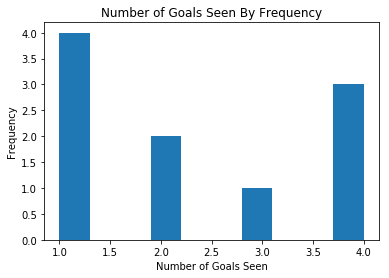

In [22]:
plt.hist(total_goals_per_game, bins=10)
plt.title('Number of Goals Seen By Frequency')
plt.xlabel('Number of Goals Seen')
plt.ylabel('Frequency')

## What is the emperical probability that the roommate saw at least 2 goals?

In [23]:
for x in range(2,9):
    for x in total_goals_per_game:
        count = total_goals_per_game.count(x)
        p_x = count/len(total_goals_per_game)
print('the emperical probability that the roommate saw at least 2 goals in the game is:', p_x)


the emperical probability that the roommate saw at least 2 goals in the game is: 0.4
